In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [2]:
df1 = pd.read_csv("Redfin_clean_data.csv")
df1

,Street,City,County,State,Zipcode,Price,WalkScore,Bike_Score,Beds,Bath,Sqft,Property_Type,Year_Built,Status
0,655 12th st #112,Oakland,Alameda-County,Ca,94607,649000.0,96,91.0,2.0,2.0,1037.0,Condo,2003.0,New
1,4475 redding st,Oakland,Alameda-County,Ca,94619,699000.0,82,47.0,2.0,2.0,990.0,Single family residential,1930.0,New
2,6501 san pablo ave #404,Oakland,Alameda-County,Ca,94608,685000.0,94,86.0,1.0,1.5,1010.0,Condo,2006.0,New
3,29467 taylor ave,Hayward,Alameda-County,Ca,94544,899999.0,52,69.0,3.0,2.5,1469.0,Single family home,1989.0,Active
4,1258 144th ave,San leandro,Alameda-County,Ca,94578,499950.0,80,55.0,2.0,1.0,545.0,Single family residential,1920.0,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2679,7100 county road 49,Guinda,Yolo-County,Ca,95637,1185000.0,16,50.0,3.0,2.5,2435.0,Single family residential,1990.0,Active
2680,543 1st st,Woodland,Yolo-County,Ca,95695,925000.0,85,79.0,4.0,2.5,2560.0,Single family residential,1890.0,Active
2681,20900 county road 95,Woodland,Yolo-County,Ca,95695,2300000.0,0,25.0,3.0,2.0,1744.0,Single family residential,1960.0,Active
2682,15644 state highway 16,Capay,Yolo-County,Ca,95607,829000.0,0,48.0,3.0,2.5,2640.0,Mobile/manufactured home,2001.0,Active


In [3]:
#A property's price should not be under $30k in order to avoid possible scams.
df1.drop(df1.index[df1['Price']<30000],inplace=True)

In [4]:
#An exploration of data was conducted in order to gain a better understanding of the data.
#The checkpoint serves as a starting point for other analyses.
df1.describe()

,Price,WalkScore,Bike_Score,Beds,Bath,Sqft,Year_Built
count,2.663000e+03,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000
mean,9.161543e+05,37.265866,41.663537,3.012768,2.214382,1776.470522,1977.779947
std,6.080004e+05,33.104902,29.590332,1.022211,0.768515,746.351164,31.362481
min,3.500000e+04,0.000000,0.000000,0.000000,0.500000,205.000000,1850.000000
25%,4.598470e+05,5.000000,13.000000,2.000000,2.000000,1232.000000,1960.000000
50%,7.500000e+05,30.000000,42.000000,3.000000,2.000000,1640.000000,1981.000000
75%,1.250000e+06,66.000000,65.000000,4.000000,2.500000,2207.500000,2002.000000
max,2.945000e+06,100.000000,100.000000,7.000000,4.500000,4209.000000,2024.000000


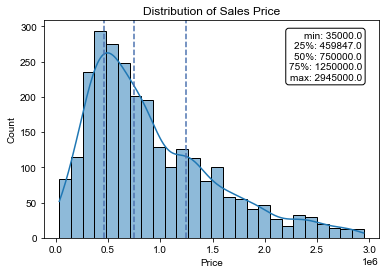

In [5]:
# To show how well the data is distributed, we plotted the prices for all counties.
# There are outliers on the higher range of house listing prices,
# so we can conclude that they are positively skewed and mean > mode

x = 'Price'
fig, ax = plt.subplots()
ax.title.set_text('Distribution of Sales Price')
feature = df1[x].fillna(df1[x].mean())
sns.histplot(feature, kde=True)
des = df1[x].describe()
ax.axvline(des["25%"], ls='--')
ax.axvline(des["50%"], ls='--')
ax.axvline(des["75%"], ls='--')
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "50%: "+des["50%"], "75%: "+des["75%"], "max: "+des["max"]))
ax.text(0.95, 0.95, box, transform=ax.transAxes, fontsize=10, va='top', 
        ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
sns.set(rc={'figure.figsize':(12,10)})

plt.show()

<AxesSubplot:>

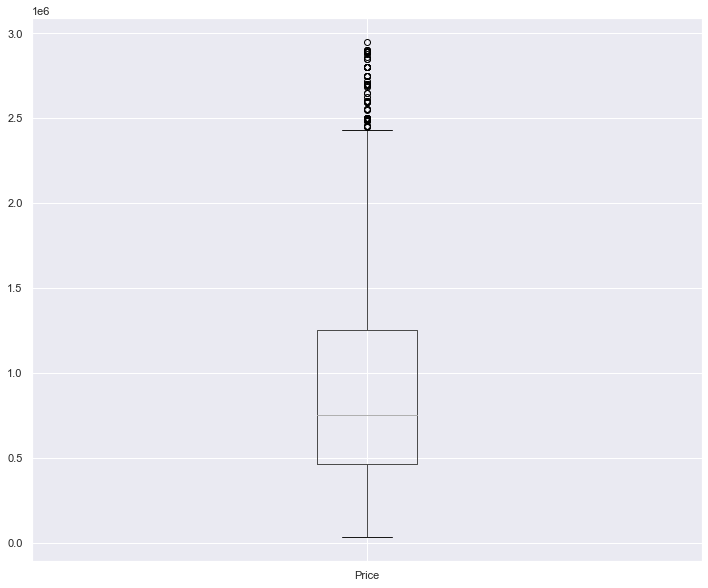

In [6]:
#An analysis of the boxplot shows that there are more outliers in high price ranges
df1.boxplot(column=['Price'])

In [7]:
#Price per square foot is created as a column
df1['Price_per_sqft'] = (df1['Price']/df1['Sqft']).round(2)
df1

,Street,City,County,State,Zipcode,Price,WalkScore,Bike_Score,Beds,Bath,Sqft,Property_Type,Year_Built,Status,Price_per_sqft
0,655 12th st #112,Oakland,Alameda-County,Ca,94607,649000.0,96,91.0,2.0,2.0,1037.0,Condo,2003.0,New,625.84
1,4475 redding st,Oakland,Alameda-County,Ca,94619,699000.0,82,47.0,2.0,2.0,990.0,Single family residential,1930.0,New,706.06
2,6501 san pablo ave #404,Oakland,Alameda-County,Ca,94608,685000.0,94,86.0,1.0,1.5,1010.0,Condo,2006.0,New,678.22
3,29467 taylor ave,Hayward,Alameda-County,Ca,94544,899999.0,52,69.0,3.0,2.5,1469.0,Single family home,1989.0,Active,612.66
4,1258 144th ave,San leandro,Alameda-County,Ca,94578,499950.0,80,55.0,2.0,1.0,545.0,Single family residential,1920.0,New,917.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2679,7100 county road 49,Guinda,Yolo-County,Ca,95637,1185000.0,16,50.0,3.0,2.5,2435.0,Single family residential,1990.0,Active,486.65
2680,543 1st st,Woodland,Yolo-County,Ca,95695,925000.0,85,79.0,4.0,2.5,2560.0,Single family residential,1890.0,Active,361.33
2681,20900 county road 95,Woodland,Yolo-County,Ca,95695,2300000.0,0,25.0,3.0,2.0,1744.0,Single family residential,1960.0,Active,1318.81
2682,15644 state highway 16,Capay,Yolo-County,Ca,95607,829000.0,0,48.0,3.0,2.5,2640.0,Mobile/manufactured home,2001.0,Active,314.02


In [8]:
#Prices per square foot in Northern California on average
df_city = df1.groupby(by="City")
df_city_price = pd.DataFrame(df_city['Price_per_sqft'].mean().round(2))
df_city_price

,Price_per_sqft
City,
Alameda,647.47
Albany,682.70
American canyon,282.40
Angels camp,316.41
Angwin,511.68
...,...
Woodland,362.93
Yosemite,695.62
Yosemite national par,1362.22


In [9]:
#The average price per square foot of the top 10 and bottom 10 cities in California

Top10 = pd.DataFrame(df_city_price.sort_values(by = 'Price_per_sqft',ascending=False).head(10))
print(Top10)
Top10['Stack'] = 'Top10'

Bottom10 = pd.DataFrame(df_city_price.sort_values(by = 'Price_per_sqft',ascending=False).tail(10))
print(Bottom10)
Bottom10['Stack'] = 'Bottom10'

                       Price_per_sqft
City                                 
Parkfield                     1400.00
Yosemite national par         1362.22
Palo alto                     1359.86
Los altos                     1352.61
Cupertino                     1168.25
Pacific grove                 1124.63
Greeley hill                  1035.38
San francisco                  998.17
Mount hermon                   979.62
Carmel                         970.45
               Price_per_sqft
City                         
La grange              179.64
Firebaugh              175.72
Magalia                171.00
Coalinga               139.12
Butte meadows          127.56
Clearlake              120.71
Avery                  112.68
Kirkwood               105.47
Richvale                88.03
Pinedale                51.20


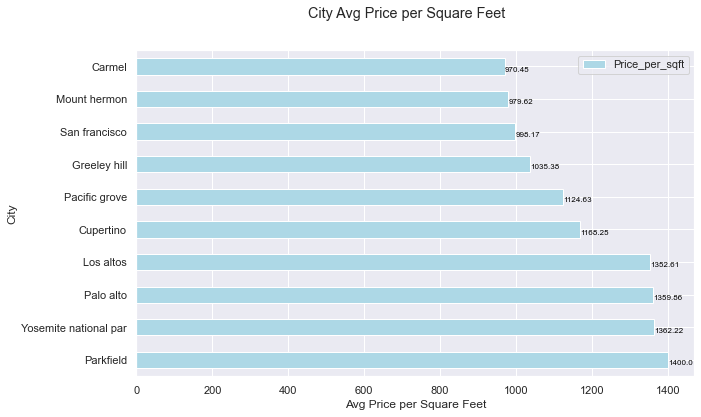

In [10]:
#Top 10 cities in CA according to Average price per square feet


# Horizontal Bar Plot
ax = Top10.plot(kind='barh',color='lightblue',figsize=(10,6))
plt.xlabel("Avg Price per Square Feet")
plt.ylabel("City") 

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.4, i.get_y()+0.1,
             str(round((i.get_width()), 2)),
             fontsize = 8, color ='black')
    
plt.suptitle('City Avg Price per Square Feet')
# Show Plot
plt.show()

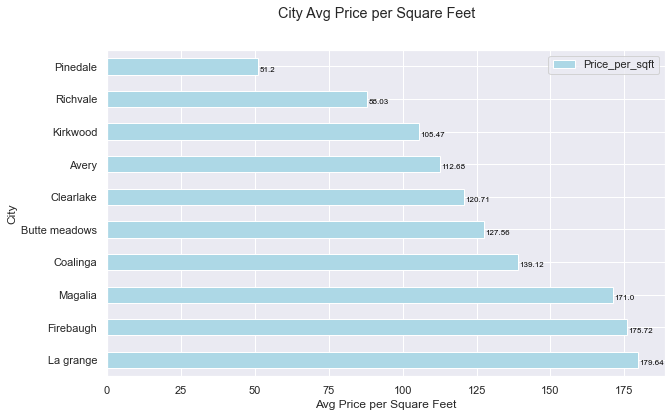

In [11]:
#Bottom 10 cities in CA accrding to Average price per square feet

 
# Horizontal Bar Plot
ax = Bottom10.plot(kind='barh',color='lightblue',figsize=(10,6))
plt.xlabel("Avg Price per Square Feet")
plt.ylabel("City") 

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.4, i.get_y()+0.1,
             str(round((i.get_width()), 2)),
             fontsize = 8, color ='black')
    
plt.suptitle('City Avg Price per Square Feet')
# Show Plot
plt.show()

In [12]:
# Number of beds/ bath countywise - total properties

properties = df1['County'].value_counts() 
print(properties)

df1[['County','Beds', 'Bath']]

Alameda-County          298
Santa-Clara-County      269
Fresno-County           264
San-Francisco-County    244
Monterey-County         237
Nevada-County           207
El-Dorado-County        186
Calaveras-County        179
Butte-County            176
Santa-Cruz-County       175
Yolo-County             169
Napa-County             166
Mariposa-County          79
Alpine-County            14
Name: County, dtype: int64


,County,Beds,Bath
0,Alameda-County,2.0,2.0
1,Alameda-County,2.0,2.0
2,Alameda-County,1.0,1.5
3,Alameda-County,3.0,2.5
4,Alameda-County,2.0,1.0
...,...,...,...
2679,Yolo-County,3.0,2.5
2680,Yolo-County,4.0,2.5
2681,Yolo-County,3.0,2.0
2682,Yolo-County,3.0,2.5


In [13]:
#number of houses with total bed in different county

cross_tab = pd.crosstab(df1['County'],df1['Beds'])
print(cross_tab)

Beds                  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0
County                                                      
Alameda-County          1   20   73  102   75   23    2    2
Alpine-County           0    6    3    3    2    0    0    0
Butte-County            0    4   66   82   20    3    1    0
Calaveras-County        2    7   38  103   24    4    1    0
El-Dorado-County        0    8   37   85   38   16    1    1
Fresno-County           0    4   38  139   64   14    5    0
Mariposa-County         0    0   28   42    9    0    0    0
Monterey-County         2   10   42  104   67   10    2    0
Napa-County             0    1   39   82   34    6    3    1
Nevada-County           2    8   34  106   44   10    2    1
San-Francisco-County    6   47   80   69   30    8    3    1
Santa-Clara-County      0   10   50  104   86   15    4    0
Santa-Cruz-County       4   12   53   65   27   11    2    1
Yolo-County             0    2   19   66   67   15    0    0


In [14]:
#Total properties according to no. of beds

beds_order_data= df1.sort_values(by ='Beds')
df_prop_beds = beds_order_data['Beds'].value_counts() 
df_prop_beds

3.0    1152
2.0     600
4.0     587
1.0     139
5.0     135
6.0      26
0.0      17
7.0       7
Name: Beds, dtype: int64

In [15]:
#Average price of house with no. of bed in top 10 city

cross_tab = pd.crosstab(index=df1['City'], columns=df1['Beds'], values=df1['Price'], margins=True, aggfunc='mean').replace(np.nan, 0).astype(np.int64)


cross_tab.loc[['Parkfield','Yosemite national par','Palo alto', 'Los altos', 'Cupertino', 'Pacific grove', 'Greeley hill', 'San francisco', 'Mount hermon', 'Carmel'],[1,2,3,4,5]]

Beds,1.0,2.0,3.0,4.0,5.0
City,,,,,
Parkfield,0,1400000,0,0,0
Yosemite national par,0,2452000,0,0,0
Palo alto,848500,0,2117500,2649000,0
Los altos,0,1450000,0,0,0
Cupertino,0,1365000,1548944,2692000,0
Pacific grove,0,1195000,1399000,0,1895000
Greeley hill,0,2200000,825000,0,0
San francisco,853939,1222749,1574109,1876529,1644624
Mount hermon,0,625000,0,0,0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Parkfield'),
  Text(1, 0, 'Yosemite national par'),
  Text(2, 0, 'Palo alto'),
  Text(3, 0, 'Los altos'),
  Text(4, 0, 'Cupertino'),
  Text(5, 0, 'Pacific grove'),
  Text(6, 0, 'Greeley hill'),
  Text(7, 0, 'San francisco'),
  Text(8, 0, 'Mount hermon'),
  Text(9, 0, 'Carmel')])

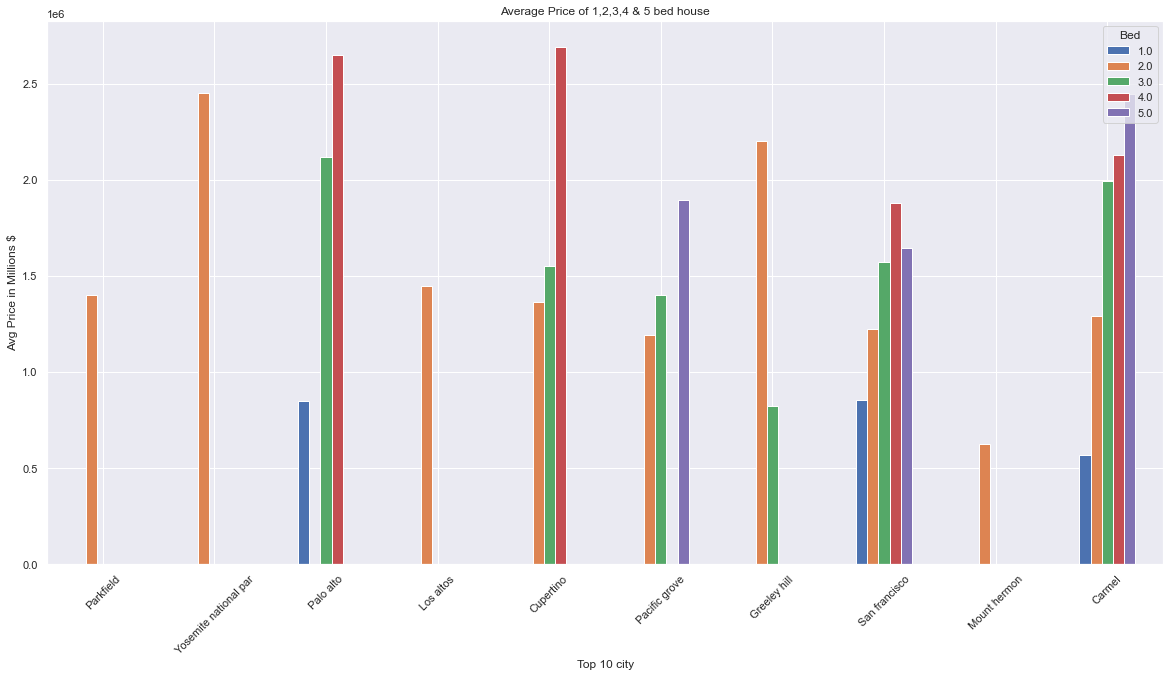

In [16]:
#Average prices of house per bed

cross_tab.loc[['Parkfield','Yosemite national par','Palo alto', 'Los altos', 'Cupertino', 'Pacific grove', 'Greeley hill', 'San francisco', 'Mount hermon', 'Carmel'],[1,2,3,4,5]].plot.bar(figsize=(20,10))

plt.title('Average Price of 1,2,3,4 & 5 bed house')
plt.ylabel('Avg Price in Millions $')
plt.xlabel('Top 10 city')
plt.legend(loc = 'upper right', ncol = 1, title = "Bed")
plt.xticks(rotation = 45)

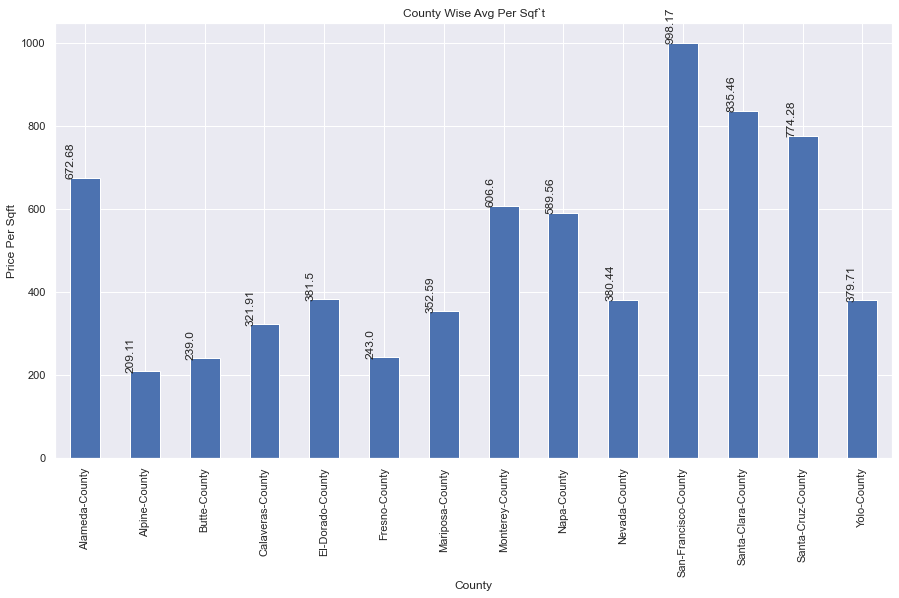

In [17]:
#Bar plot of county and average price per sqft
df_grp = df1.groupby(['County'])['Price_per_sqft'].mean().round(2)
ax = df_grp.plot(kind='bar', figsize = (15,8))
plt.ylabel("Price Per Sqft")
plt.title('County Wise Avg Per Sqf`t')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), horizontalalignment='center', rotation='vertical')


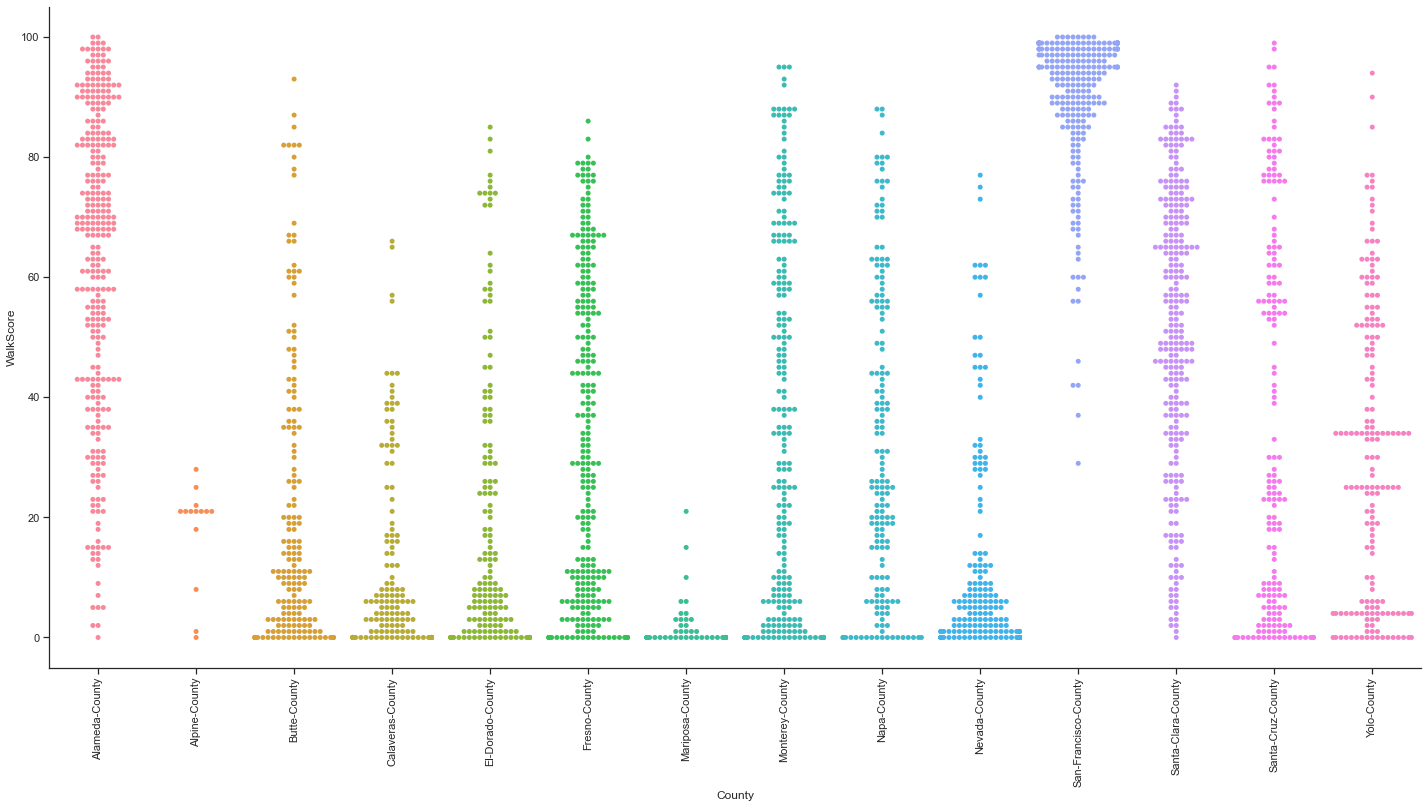

In [18]:
#Catplot of walkscore and bike score to check range of scores county wise
import matplotlib.pyplot as plot
import warnings
warnings.filterwarnings('ignore')
new_df = df1.dropna(subset=['County', 'WalkScore', 'Bike_Score'])

sns.set_theme(style="ticks", color_codes=True)
g = sns.catplot(x="County", y="WalkScore", data=new_df, height=10, aspect=20/10, kind='swarm')
g.set_xticklabels(rotation=90)

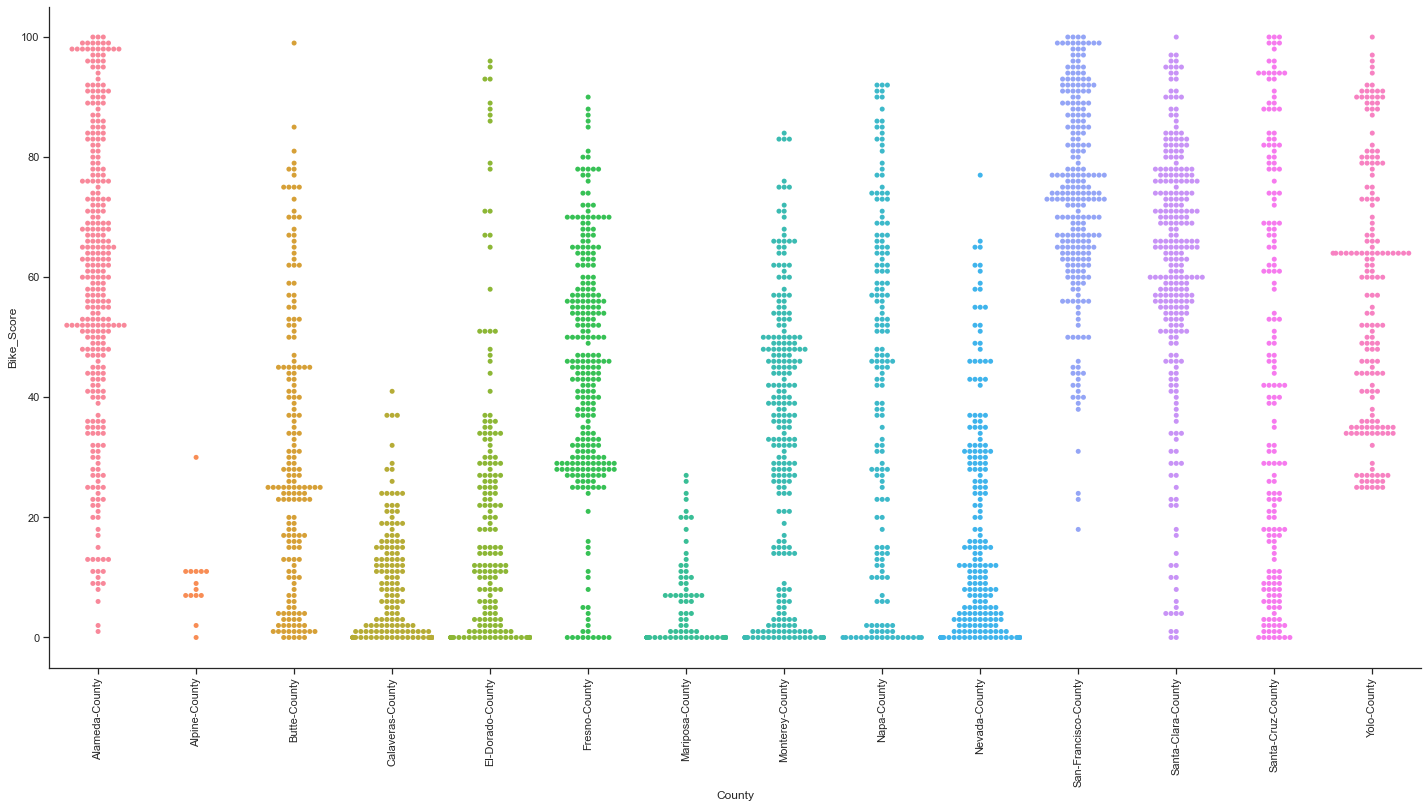

In [19]:
warnings.filterwarnings('ignore')
new_df = df1.dropna(subset=['County', 'WalkScore', 'Bike_Score'])

sns.set_theme(style="ticks", color_codes=True)
g = sns.catplot(x="County", y="Bike_Score", data=new_df, height=10, aspect=20/10, kind='swarm')
g.set_xticklabels(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Monterey-County'),
  Text(1, 0, 'Mariposa-County'),
  Text(2, 0, 'Santa-Clara-County'),
  Text(3, 0, 'Santa-Cruz-County'),
  Text(4, 0, 'San-Francisco-County')])

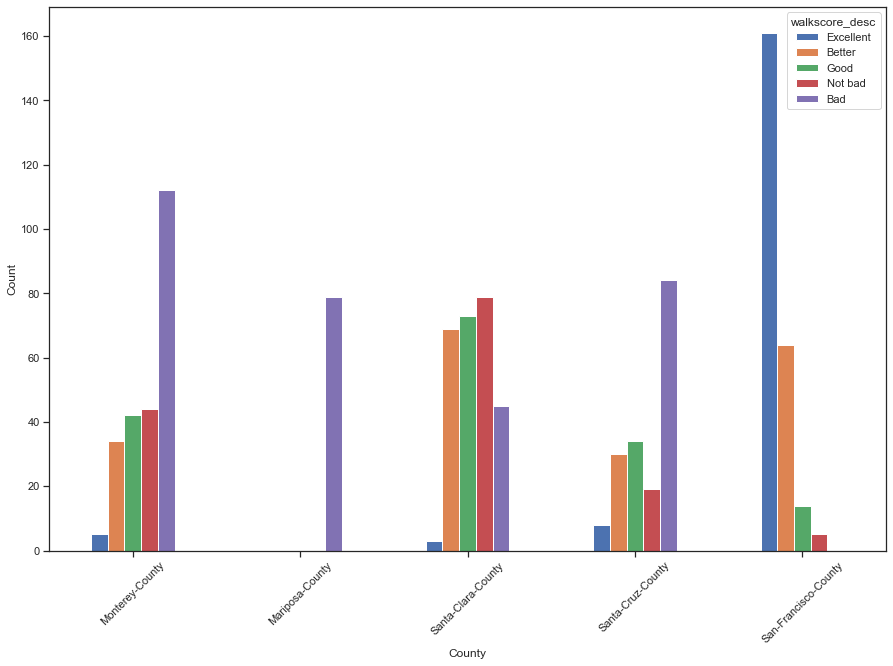

In [20]:
#Categorizing scores into ordinal categories
walkscore_list = []
for t in df1['WalkScore']:
    if t <= 100 and t >= 90:
        walkscore_list.append('Excellent')
    elif t <= 89 and t >= 70:
        walkscore_list.append('Better')
    elif t <= 69 and t >= 50:
        walkscore_list.append('Good')
    elif t <= 49 and t >= 25:
        walkscore_list.append('Not bad')
    elif t <= 24 and t >= 0:
        walkscore_list.append('Bad')
    else:
        walkscore_list.append('')
df1['walkscore_desc'] = walkscore_list
g = pd.crosstab(df1['County'], df1['walkscore_desc'])
County_5 = ['Monterey-County','Mariposa-County','Santa-Clara-County','Santa-Cruz-County','San-Francisco-County']
unique_ts = list(df1['walkscore_desc'].unique())
g.loc[County_5, unique_ts].plot.bar(figsize=(15,10))
plot.xlabel('County')
plot.ylabel('Count')
plot.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Monterey-County'),
  Text(1, 0, 'Mariposa-County'),
  Text(2, 0, 'Santa-Clara-County'),
  Text(3, 0, 'Santa-Cruz-County'),
  Text(4, 0, 'San-Francisco-County')])

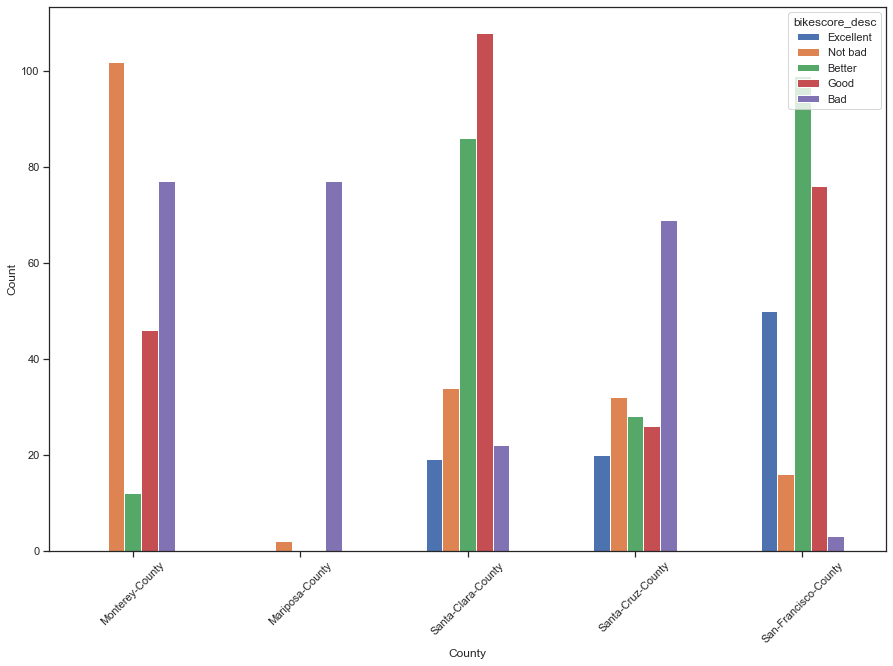

In [21]:
bikescore_list = []
for t in df1['Bike_Score']:
    if t <= 100 and t >= 90:
        bikescore_list.append('Excellent')
    elif t <= 89 and t >= 70:
        bikescore_list.append('Better')
    elif t <= 69 and t >= 50:
        bikescore_list.append('Good')
    elif t <= 49 and t >= 25:
        bikescore_list.append('Not bad')
    elif t <= 24 and t >= 0:
        bikescore_list.append('Bad')
    else:
        bikescore_list.append('')
df1['bikescore_desc'] = bikescore_list
g = pd.crosstab(df1['County'], df1['bikescore_desc'])
County_5 = ['Monterey-County','Mariposa-County','Santa-Clara-County','Santa-Cruz-County','San-Francisco-County']
unique_ts = list(df1['bikescore_desc'].unique())
g.loc[County_5, unique_ts].plot.bar(figsize=(15,10))
plot.xlabel('County')
plot.ylabel('Count')
plot.xticks(rotation=45)

Text(0.5, 1.0, 'Correlation b/w Price and WalkScores')

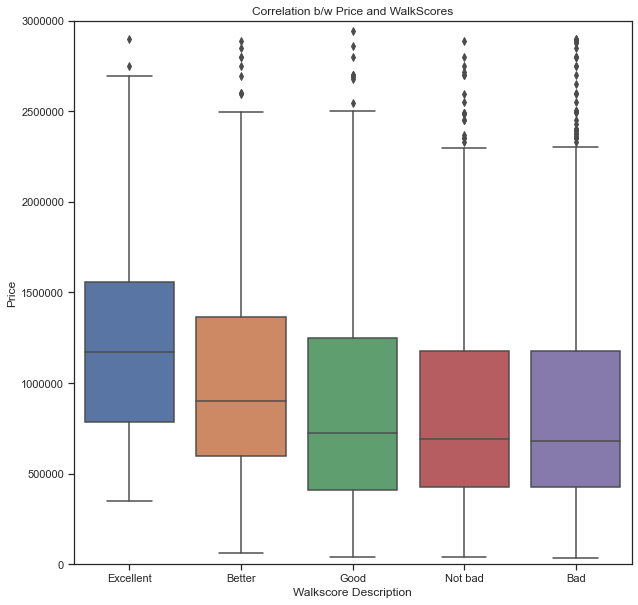

In [22]:
# Price range based on the walkscore and bikescore (averaged for each county)
plot.figure(figsize=(10,10))
sns.boxplot(x="walkscore_desc", y="Price", data=df1)
plot.ticklabel_format(style='plain', axis='y')
plot.ylim(0, 3000000)
plot.ylabel("Price")
plot.xlabel("Walkscore Description")
plot.title("Correlation b/w Price and WalkScores")

Text(0.5, 1.0, 'Correlation b/w Price and BikeScores')

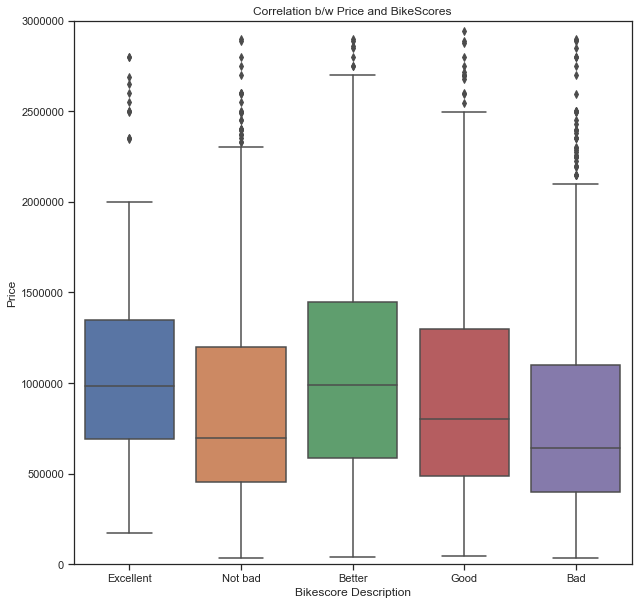

In [23]:
plot.figure(figsize=(10,10))
sns.boxplot(x="bikescore_desc", y="Price", data=df1)
plot.ticklabel_format(style='plain', axis='y')
plot.ylim(0, 3000000)
plot.ylabel("Price")
plot.xlabel("Bikescore Description")
plot.title("Correlation b/w Price and BikeScores")

In [24]:
#Crosstab between county & status, county & property type to see how manu properties belong to different categories
#of status and property type
cross_tab = pd.crosstab(df1['County'],df1['Status'])
cross_tab

Status,Active,Active-reo,Backup,Coming soon,New,Pending sale,Price change
County,,,,,,,
Alameda-County,149,1,0,1,142,0,5
Alpine-County,14,0,0,0,0,0,0
Butte-County,175,0,0,0,0,1,0
Calaveras-County,178,0,0,0,1,0,0
El-Dorado-County,186,0,0,0,0,0,0
Fresno-County,263,0,1,0,0,0,0
Mariposa-County,79,0,0,0,0,0,0
Monterey-County,236,0,0,0,1,0,0
Napa-County,165,0,0,1,0,0,0


In [25]:
cross_tab = pd.crosstab(df1['County'],df1['Property_Type'])
cross_tab

Property_Type,Cabin,Co-op,Commercial/residential,Condo,Double-wide mobile home,Duplex,Fourplex,Manufactured on land,Mobile/manufactured home,Multi family,...,"Residential, share ownership","Residential, single family","Residential, townhouse",Single family,Single family home,Single family residence,Single family residential,Single-wide mobile home,Townhouse,Triplex
County,,,,,,,,,,,,,,,,,,,,,
Alameda-County,0,2,0,60,0,0,0,0,1,0,...,0,0,0,0,24,1,178,0,20,1
Alpine-County,0,0,0,10,0,0,0,0,0,0,...,0,1,0,0,0,2,1,0,0,0
Butte-County,1,0,1,3,0,1,0,30,17,0,...,0,0,0,0,0,108,12,0,0,1
Calaveras-County,0,0,0,3,0,0,0,0,21,0,...,0,0,0,0,0,2,143,1,2,0
El-Dorado-County,1,0,0,7,0,0,0,0,14,0,...,0,16,4,0,1,2,128,0,0,0
Fresno-County,0,0,0,18,0,0,0,1,2,4,...,0,1,0,0,3,22,4,0,0,0
Mariposa-County,0,0,1,0,0,1,0,8,3,0,...,0,0,0,0,1,43,19,0,1,0
Monterey-County,1,0,0,24,13,3,1,1,0,0,...,0,0,0,1,167,8,7,7,0,0
Napa-County,0,0,0,10,0,0,0,1,22,0,...,0,0,0,1,3,1,115,0,8,0


In [26]:
#Categorizing property types into generic categories

In [27]:
Property_Type_Category =[]
for i in df1['Property_Type']:
    if i in ['Single family', 'Single family home', 'Single family residence',
                'Single family residential','Single-wide mobile home']:
        Property_Type_Category.append('Single')
        
    elif i in ['Residential, single family', 'Residential, townhouse', 'Townhouse']:
        Property_Type_Category.append('Residential')
        
    elif i in ['Cabin', 'Co-op', 'Condo', 'Condo/co-op']:
        Property_Type_Category.append('Condo')
        
    else :
        Property_Type_Category.append('Others')

In [28]:
df1['Property_Type_Category'] =Property_Type_Category
df1

,Street,City,County,State,Zipcode,Price,WalkScore,Bike_Score,Beds,Bath,Sqft,Property_Type,Year_Built,Status,Price_per_sqft,walkscore_desc,bikescore_desc,Property_Type_Category
0,655 12th st #112,Oakland,Alameda-County,Ca,94607,649000.0,96,91.0,2.0,2.0,1037.0,Condo,2003.0,New,625.84,Excellent,Excellent,Condo
1,4475 redding st,Oakland,Alameda-County,Ca,94619,699000.0,82,47.0,2.0,2.0,990.0,Single family residential,1930.0,New,706.06,Better,Not bad,Single
2,6501 san pablo ave #404,Oakland,Alameda-County,Ca,94608,685000.0,94,86.0,1.0,1.5,1010.0,Condo,2006.0,New,678.22,Excellent,Better,Condo
3,29467 taylor ave,Hayward,Alameda-County,Ca,94544,899999.0,52,69.0,3.0,2.5,1469.0,Single family home,1989.0,Active,612.66,Good,Good,Single
4,1258 144th ave,San leandro,Alameda-County,Ca,94578,499950.0,80,55.0,2.0,1.0,545.0,Single family residential,1920.0,New,917.34,Better,Good,Single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2679,7100 county road 49,Guinda,Yolo-County,Ca,95637,1185000.0,16,50.0,3.0,2.5,2435.0,Single family residential,1990.0,Active,486.65,Bad,Good,Single
2680,543 1st st,Woodland,Yolo-County,Ca,95695,925000.0,85,79.0,4.0,2.5,2560.0,Single family residential,1890.0,Active,361.33,Better,Better,Single
2681,20900 county road 95,Woodland,Yolo-County,Ca,95695,2300000.0,0,25.0,3.0,2.0,1744.0,Single family residential,1960.0,Active,1318.81,Bad,Not bad,Single
2682,15644 state highway 16,Capay,Yolo-County,Ca,95607,829000.0,0,48.0,3.0,2.5,2640.0,Mobile/manufactured home,2001.0,Active,314.02,Bad,Not bad,Others


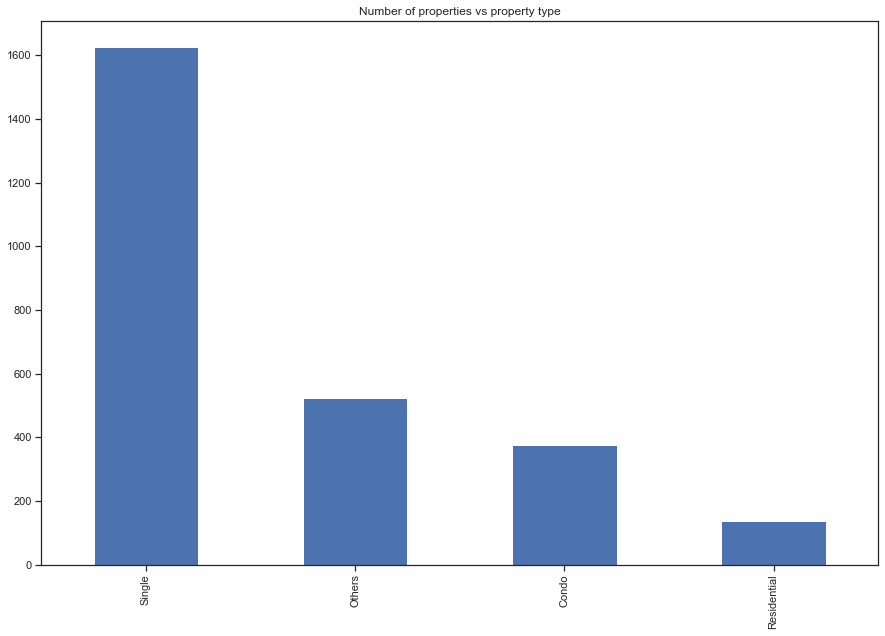

In [29]:
#Bar plot of Proeprty type category vs Number of properties
ax = df1['Property_Type_Category'].value_counts().plot(kind='bar',figsize=(15,10),
                                                      title='Number of properties vs property type')

In [30]:
#Prediction Analysis

<AxesSubplot:>

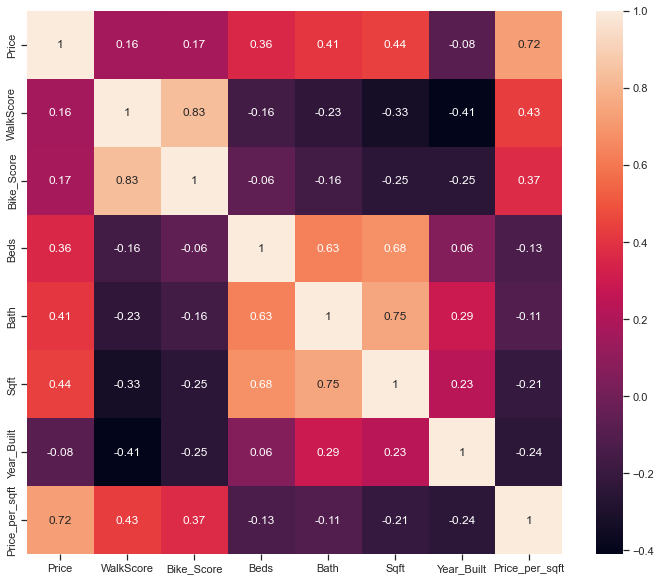

In [31]:
#Plotting correlation matrix to see how Price is correlated with other variables
correlation_matrix = df1.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
# It shows price is correlated to Sqft followed by Bath and Bed.
# It also shows that years built has almost no correlation with price which means land maintains its 
#value over the years and additional significant modification done on the property would not result in significant gain.

In [32]:
#X - columns that will be used for prediction
#Y - target variable that will be predicted

In [33]:
#Including attributes with positive correlation as independent variables
X=df1[['WalkScore','Bike_Score','Beds','Bath','Sqft']]

In [34]:
Y=df1['Price'].values

In [35]:
#splitting data into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.8)

In [36]:
#fitting and transforming model
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.fit_transform(X_test.astype(np.float))

In [37]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [38]:
#intercept and slope
print(regressor.intercept_)
print(regressor.coef_)

918302.8478873239
[179243.16379522  26050.58893739   1443.60112392 101532.66029889
 254485.2835765 ]


In [39]:
#predicting the test data
Y_pred = regressor.predict(X_test)

<AxesSubplot:ylabel='Density'>

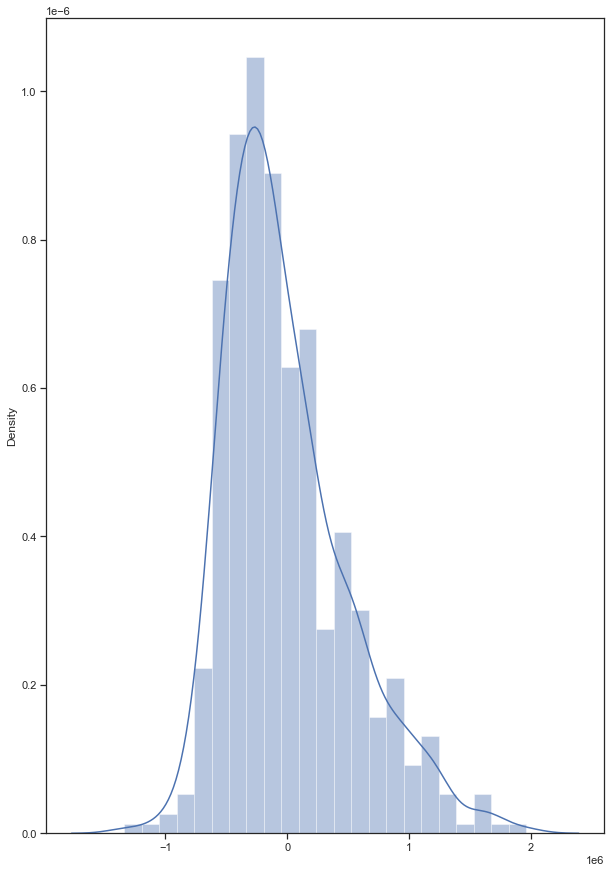

In [40]:
#plotting residuals graph 
fig = plt.figure(figsize=(10,15))
residuals = (Y_test - Y_pred)
sns.distplot(residuals)

In [41]:
#actual vs predicted and errors
df_pred = pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})
print(df_pred.head())
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test,Y_pred)) 
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test,Y_pred)) 
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_absolute_error(Y_test,Y_pred)))
print('Variance Score: ', metrics.explained_variance_score(Y_test,Y_pred))

     Actual     Predicted
0  119950.0  8.662884e+05
1  469000.0  6.608161e+05
2  335000.0  6.386761e+05
3  935000.0  1.280816e+06
4   63000.0  5.983447e+05
Mean Absolute Error:  396592.8839421811
Mean Squared Error:  255015136104.46536
Root Mean Squared Error:  629.7562099274458
Variance Score:  0.3300618324679834


                    Coeff
Bath        134856.914014
Beds         16454.454724
WalkScore     5611.939227
Bike_Score     789.088920
Sqft           319.034472


R^2 is:  0.3126758336198898


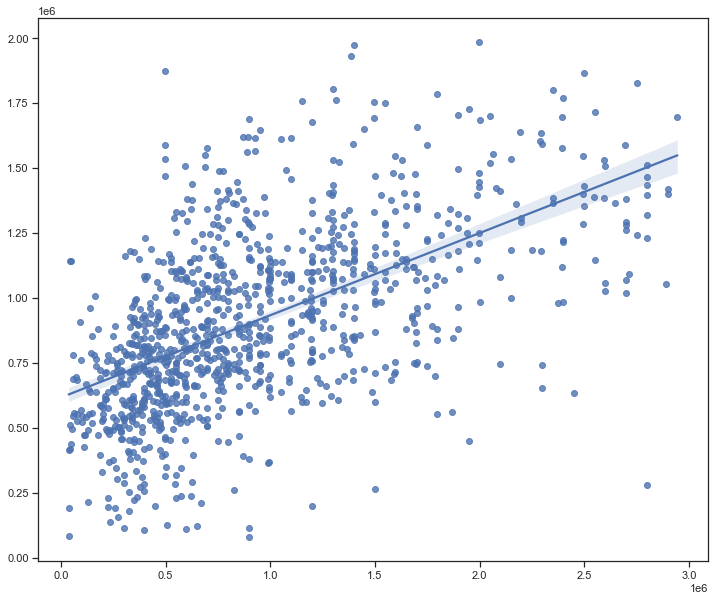

In [42]:
lm=LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40, random_state=101)

lm.fit(X_train,Y_train) #fitting the model

predictions=lm.predict(X_test) #calculating predictions based on the model creaated in previous line

sns.regplot(Y_test,predictions,fit_reg=True) #plotting the model

cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff']) #Creating a datframe of coefficients obtained from the model
print(cdf.sort_values(by='Coeff',ascending=False))

print("\n")

print("R^2 is: ",lm.score(X,Y))